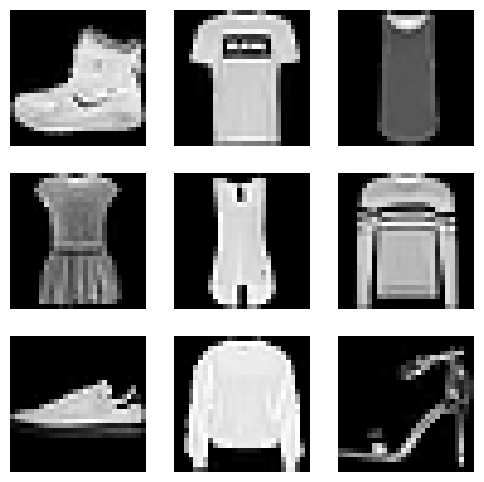

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

# ✅ The correct module name is 'datasets', not 'dataset'
fmnist = tf.keras.datasets.fashion_mnist

# ✅ Correct function call
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

# ✅ Display the first 9 images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [4]:
class TFModel:
    fmnist = tf.keras.datasets.fashion_mnist
    (X_train, y_train), (X_test, y_test) = fmnist.load_data()
    X_train, x_test = X_train/255, X_test/255
    X_train, y_train = X_train[:10000],y_train[:10000]

    def training(self):
        model=tf.keras.models.Sequential(
            [
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(128,activation='relu'),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(10),
            ]
        )
        loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
        model.fit(self.X_train, self.y_train, epochs=1)

        return model
        

In [7]:
tfmodel = TFModel()
model = tfmodel.training()

  super().__init__(**kwargs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7342 - loss: 0.7603


In [8]:
import numpy as np

# Create a new instance (optional — or reuse tfmodel)
tfmodel = TFModel()
model = tfmodel.training()

# Get the first test image (reshape to batch size = 1)
sample = tfmodel.X_test[0:1]  # ✅ correct slicing
pred = model.predict(sample)

# Convert raw logits to predicted class
predicted_class = np.argmax(pred, axis=1)
print("Predicted class:", predicted_class)
print("True label:", tfmodel.y_test[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7189 - loss: 0.7924
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted class: [9]
True label: 9


In [10]:
# === Step 3: Package locally (OCI-free) ===
import yaml

artifact_dir = tempfile.mkdtemp()
print(f"✅ Local artifact directory: {artifact_dir}")

# Save TensorFlow model (✅ correct format)
model_save_path = os.path.join(artifact_dir, "model")
model.export(model_save_path)  # instead of model.save()

# Create runtime.yaml manually
runtime_yaml = {
    "INFERENCE_ENV_PATH": "tensorflow26_p37_cpu_v2",
    "MODEL_ARTIFACT_VERSION": "2.0",
    "MODEL_DEPLOYMENT": {
        "INFERENCE_CONDA_ENV": "tensorflow26_p37_cpu_v2",
        "INFERENCE_ENV_SLUG": "tensorflow26",
        "INFERENCE_ENV_TYPE": "python"
    }
}
with open(os.path.join(artifact_dir, "runtime.yaml"), "w") as f:
    yaml.dump(runtime_yaml, f)

# Create score.py manually
score_py = """import tensorflow as tf
import numpy as np
import os

def load_model(model_dir):
    return tf.keras.models.load_model(os.path.join(model_dir, "model"))

def predict(data, model):
    arr = np.array(data)
    preds = model.predict(arr)
    return preds.tolist()
"""
with open(os.path.join(artifact_dir, "score.py"), "w") as f:
    f.write(score_py)

print("✅ Model packaged locally (OCI-free).")
print("📂 Files in artifact dir:", os.listdir(artifact_dir))


✅ Local artifact directory: C:\Users\ytian\AppData\Local\Temp\tmpyu188aef
INFO:tensorflow:Assets written to: C:\Users\ytian\AppData\Local\Temp\tmpyu188aef\model\assets
Saved artifact at 'C:\Users\ytian\AppData\Local\Temp\tmpyu188aef\model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1653360057360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1653360056592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1653360053328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1653360053904: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model packaged locally (OCI-free).
📂 Files in artifact dir: ['model', 'runtime.yaml', 'score.py']
